In [1]:
from generator import Generator
from discriminator import Discriminator
from torch import nn
import torch
from first_gan.training import Training

In [2]:
# initialize some parameters
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001
device = 'cpu'

In [4]:
from torchvision.datasets import MNIST # Training dataset
from torch.utils.data import DataLoader
from torchvision import transforms
dataloader = DataLoader(
    MNIST('.', download=False, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

In [5]:
# initialize GAN
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr = lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr = lr)

In [6]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True
gen_loss = False
error = False

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1, step 500: Generator loss: 1.3247398734092704, discriminator loss: 0.423478152215481
Epoch 2, step 1000: Generator loss: 1.7111072664260845, discriminator loss: 0.27892829796671864
Epoch 3, step 1500: Generator loss: 1.9468280401229858, discriminator loss: 0.16797775176167493
Epoch 4, step 2000: Generator loss: 1.6345756506919846, discriminator loss: 0.21875435242056834
Epoch 5, step 2500: Generator loss: 1.6684512963294988, discriminator loss: 0.20751276990771308
Epoch 6, step 3000: Generator loss: 1.9288422374725354, discriminator loss: 0.1700619394034146
Epoch 7, step 3500: Generator loss: 2.4688951721191406, discriminator loss: 0.12204174986481675
Epoch 8, step 4000: Generator loss: 2.8816313223838814, discriminator loss: 0.09543704700469975
Epoch 9, step 4500: Generator loss: 3.246902241230014, discriminator loss: 0.08241872718185182
Epoch 10, step 5000: Generator loss: 3.539505973815915, discriminator loss: 0.07469360297173258
Epoch 11, step 5500: Generator loss: 3.812263

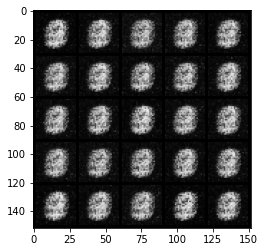

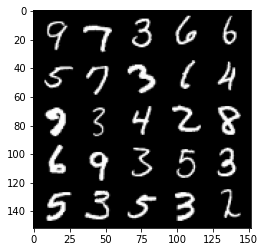

  0%|          | 0/469 [00:00<?, ?it/s]

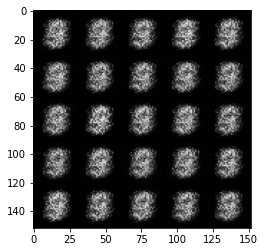

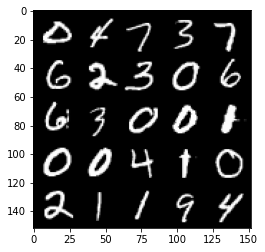

  0%|          | 0/469 [00:00<?, ?it/s]

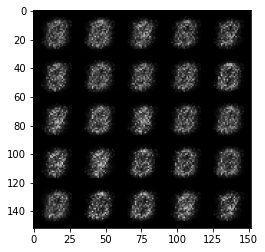

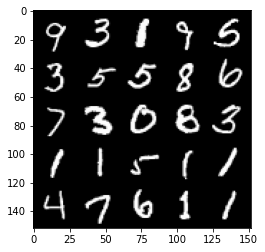

  0%|          | 0/469 [00:00<?, ?it/s]

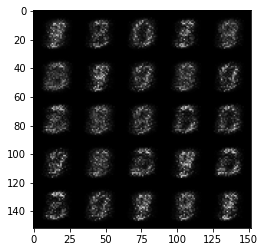

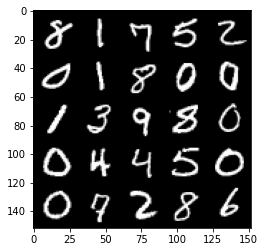

  0%|          | 0/469 [00:00<?, ?it/s]

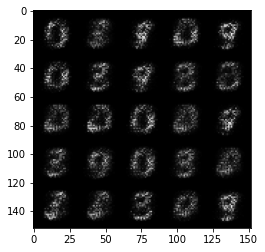

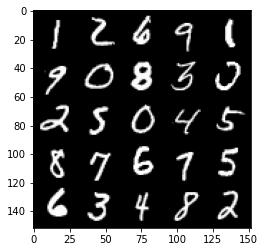

  0%|          | 0/469 [00:00<?, ?it/s]

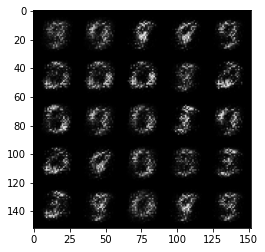

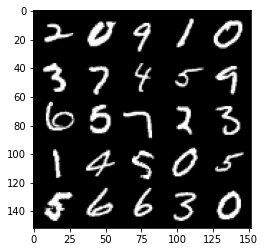

  0%|          | 0/469 [00:00<?, ?it/s]

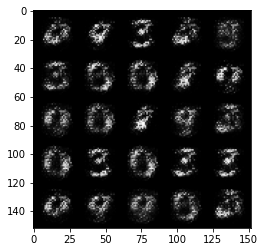

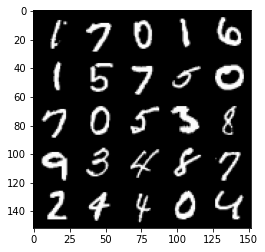

  0%|          | 0/469 [00:00<?, ?it/s]

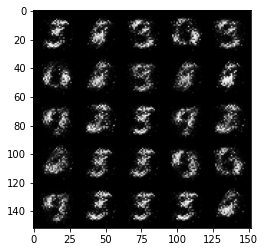

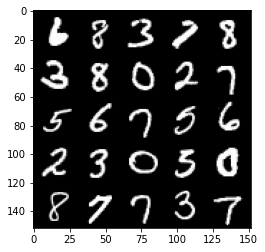

  0%|          | 0/469 [00:00<?, ?it/s]

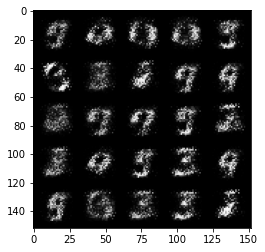

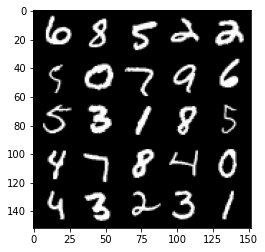

  0%|          | 0/469 [00:00<?, ?it/s]

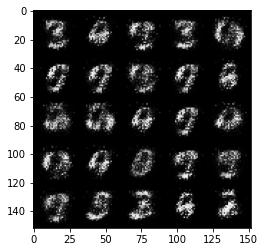

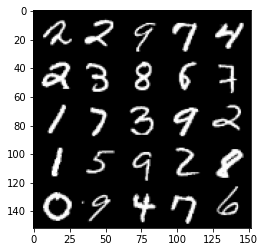

  0%|          | 0/469 [00:00<?, ?it/s]

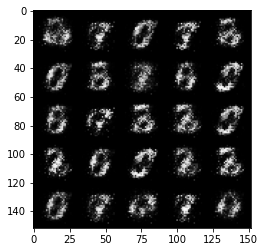

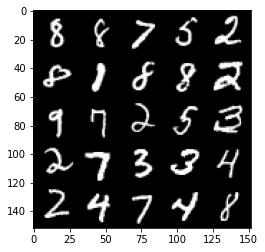

  0%|          | 0/469 [00:00<?, ?it/s]

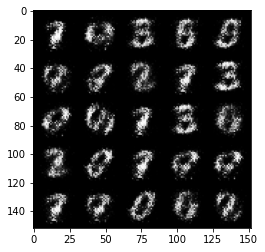

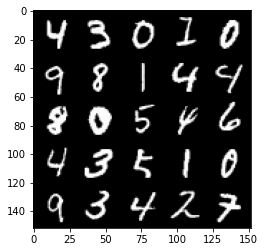

  0%|          | 0/469 [00:00<?, ?it/s]

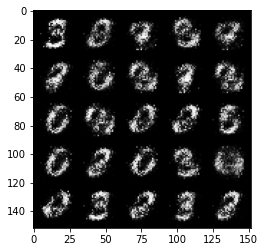

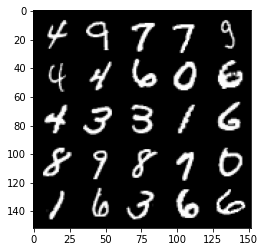

  0%|          | 0/469 [00:00<?, ?it/s]

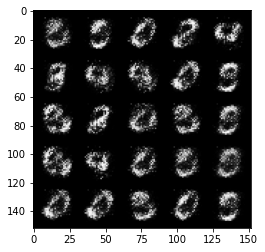

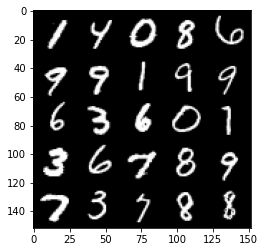

  0%|          | 0/469 [00:00<?, ?it/s]

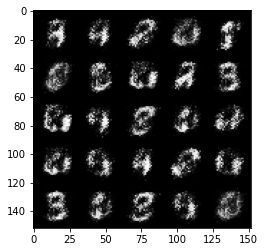

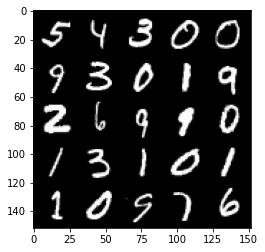

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

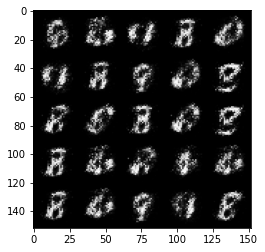

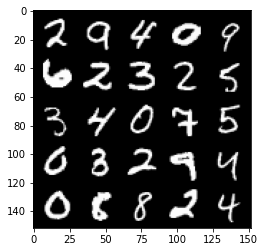

  0%|          | 0/469 [00:00<?, ?it/s]

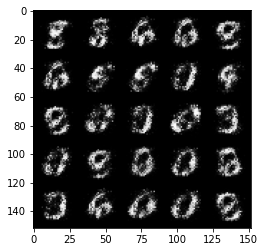

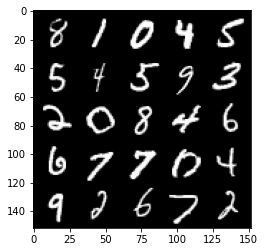

KeyboardInterrupt: 

In [7]:
Training(gen, disc, criterion, z_dim, n_epochs, dataloader, device,
             disc_opt, gen_opt, cur_step, display_step, mean_discriminator_loss, mean_generator_loss)